<a href="https://colab.research.google.com/github/Gh0st116/sklearn-classification/blob/main/project_finishing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Database

In [2]:
url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(url)

data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
switch = {
    0: 1,
    1 : 0
}
data["finished"] = data.unfinished.map(switch)

data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


## Plotting database

<Axes: xlabel='expected_hours', ylabel='price'>

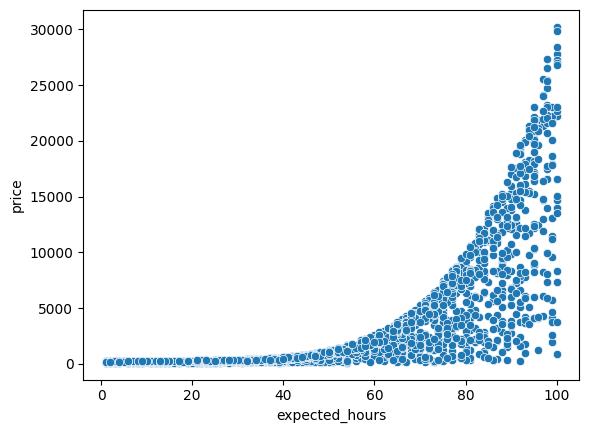

In [4]:
sns.scatterplot(x="expected_hours", y="price", data=data)

<Axes: xlabel='expected_hours', ylabel='price'>

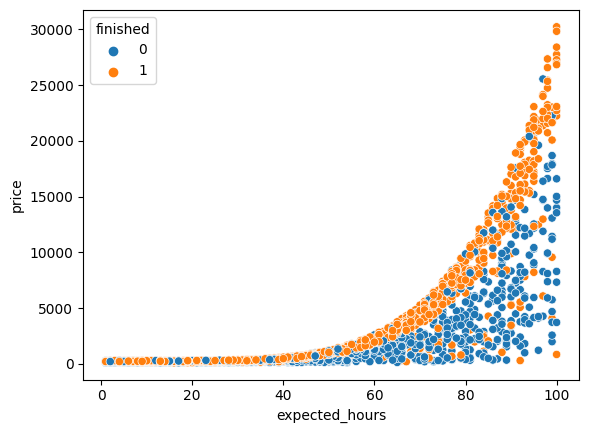

In [5]:
sns.scatterplot(x="expected_hours", y="price", hue="finished", data=data)

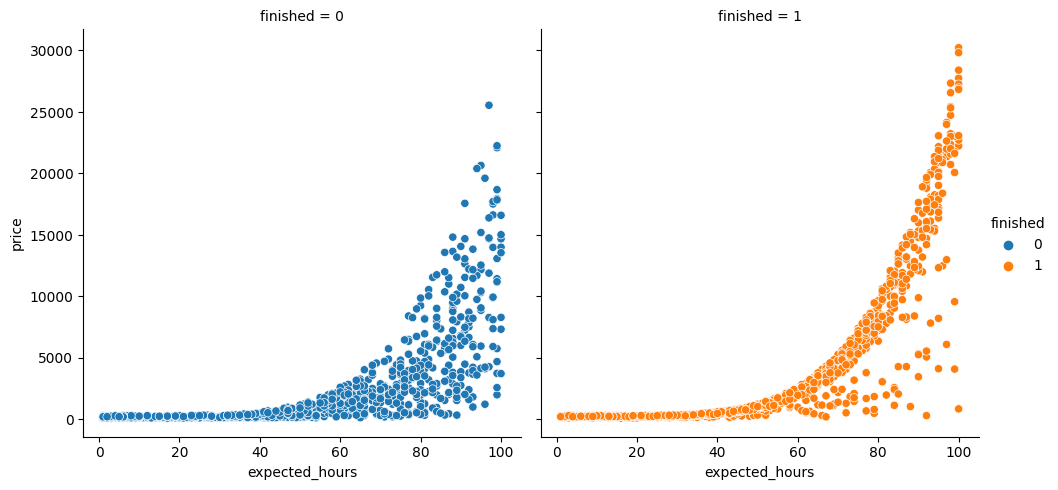

In [6]:
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished", data=data)

## Train and test data

In [7]:
X = data[["expected_hours", "price"]]
y = data["finished"]

In [8]:
SEED = 5
np.random.seed(SEED)

train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y)

# Model fit

In [9]:
model = LinearSVC()
model.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

# Predict and Accuracy

In [10]:
predict = model.predict(test_X)

In [11]:
accuracy = accuracy_score(test_y, predict)
print(f"accuracy: {(accuracy * 100):.2f}%")

accuracy: 49.26%


# Baseline algorythm

In [12]:
base_predict = np.ones(540)
accuracy_one = accuracy_score(test_y, base_predict)
print(f"accuracy of baseline algorythm: {(accuracy_one * 100):.2f}%")

accuracy of baseline algorythm: 52.59%


<Axes: xlabel='expected_hours', ylabel='price'>

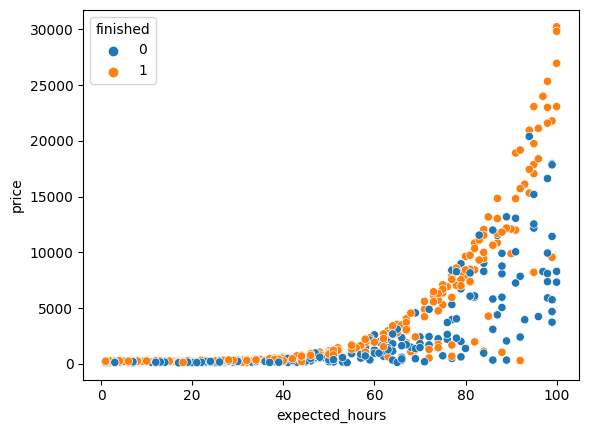

In [13]:
sns.scatterplot(x="expected_hours", y="price", hue=test_y, data=test_X)

# Filling empty spaces in graph with points

In [14]:
x_min = test_X.expected_hours.min()
x_max = test_X.expected_hours.max()
y_min = test_X.price.min()
y_max = test_X.price.max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [15]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [16]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [17]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


## Plotting decision boundary

Text(0.5, 1.0, 'Decision boundary')

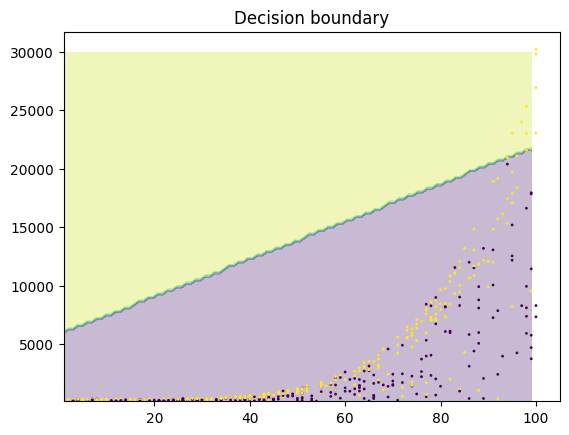

In [18]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_X.expected_hours, test_X.price, c=test_y, s=1)
plt.title("Decision boundary")

# Using SVC and Preprocessing

In [19]:
SEED = 5
np.random.seed(SEED)

raw_train_X, raw_test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y)
scaler = StandardScaler()
scaler.fit(raw_train_X)
train_X = scaler.transform(raw_train_X)
test_X = scaler.transform(raw_test_X)

model = SVC(gamma='auto')
model.fit(train_X, train_y)

predict = model.predict(test_X)

accuracy = accuracy_score(test_y, predict)
print(f"accuracy: {(accuracy * 100):.2f}%")

accuracy: 66.85%


## Plotting decision boundary

Text(0.5, 1.0, 'Decision boundary')

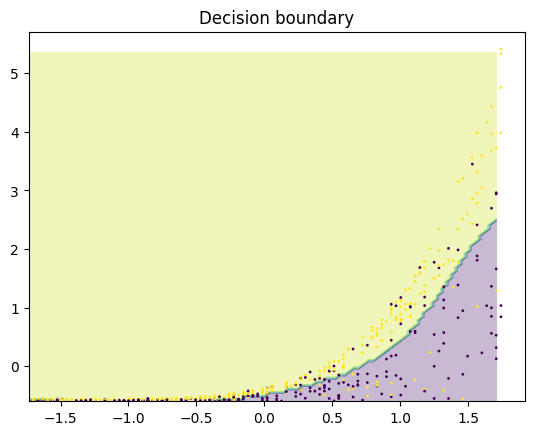

In [20]:
data_x = test_X[:, 0]
data_y = test_X[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)
plt.title("Decision boundary")